In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sns.set_style('whitegrid')

#### Train Data

In [6]:
df_train = pd.read_csv(r'train.csv', nrows=200000, parse_dates=["pickup_datetime"])

#### Exploratory Data Analysis

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
df_train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  50000.000000      50000.000000     50000.000000       50000.000000   
mean      11.364171        -72.509756        39.933759         -72.504616   
std        9.685557         10.393860         6.224857          10.407570   
min       -5.000000        -75.423848       -74.006893         -84.654241   
25%        6.000000        -73.992062        40.734880         -73.991152   
50%        8.500000        -73.981840        40.752678         -73.980082   
75%       12.500000        -73.967148        40.767360         -73.963584   
max      200.000000         40.783472       401.083332          40.851027   

       dropoff_latitude  passenger_count  
count      50000.000000     50000.000000  
mean          39.926251         1.667840  
std            6.014737         1.289195  
min          -74.006377         0.000000  
25%           40.734372         1.000000  
50%           40.753372         1.000000  
75%           40.768167         2.000000  
max           43.415190         6.000000

In [9]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

### Data Pre-Processing

#### Minimum Fare-Amount is Negative, so we have to remove these observations

In [10]:
df_train = df_train[df_train["fare_amount"] >= 0]

In [11]:
len(df_train)

49994

#### Histogram of fare amount

<ipython-input-12-c5acfff9dee3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False);


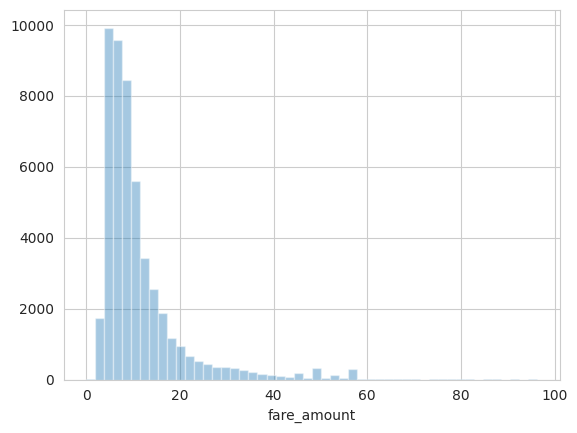

In [12]:
sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False);

**Notice - small spikes between \$40 and \$60**

### Remove Missing Data

In [13]:
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [14]:
df_train = df_train.dropna(how='any', axis='rows')

In [15]:
len(df_train)

49994

### Test Data

In [16]:
df_test = pd.read_csv(r'train.csv')

In [17]:
df_test.head(5)

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [18]:
df_test.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  50000.000000      50000.000000     50000.000000       50000.000000   
mean      11.364171        -72.509756        39.933759         -72.504616   
std        9.685557         10.393860         6.224857          10.407570   
min       -5.000000        -75.423848       -74.006893         -84.654241   
25%        6.000000        -73.992062        40.734880         -73.991152   
50%        8.500000        -73.981840        40.752678         -73.980082   
75%       12.500000        -73.967148        40.767360         -73.963584   
max      200.000000         40.783472       401.083332          40.851027   

       dropoff_latitude  passenger_count  
count      50000.000000     50000.000000  
mean          39.926251         1.667840  
std            6.014737         1.289195  
min          -74.006377         0.000000  
25%           40.734372         1.000000  
50%           40.753372         1.000000  
75%           40.768167         2.000000  
max           43.415190         6.000000

#### NewYork City coordinates are https://www.travelmath.com/cities/New+York,+NY

In [19]:
latitude =  40.7141667
longitude =  -74.0063889

#### Here, we will try to define bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from test.csv.
This will help us to make sure to train a model for the full pickup/dropoff co-ordinate range for the test set.

#### Minimum and Maximum Longitude Test set

In [20]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))

-84.654241


In [21]:
print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

40.851027


In [22]:
print(min(df_train["pickup_longitude"].min(), df_train["dropoff_longitude"].min()))

-84.654241


In [23]:
print(max(df_train["pickup_longitude"].max(), df_train["dropoff_longitude"].max()))

40.851027


#### Minimum and Maximum Latutude Test Set

In [24]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))

-74.006893


In [25]:
print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

401.083332


In [26]:
print(min(df_train["pickup_latitude"].min(), df_train["dropoff_latitude"].min()))

-74.006893


In [27]:
print(max(df_train["pickup_latitude"].max(), df_train["dropoff_latitude"].max()))

401.083332


### Function for selecting the bounding box

In [28]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) &
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))

#### Load Image of NYC Map for Visualization

In [29]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [31]:
nyc_map = plt.imread('nyc.jpg')

In [32]:
df_train = df_train[select_within_boundingbox(df_train, BB)]

In [33]:
print("New size {}".format(len(df_train)))

New size 48898


#### Function will be used for plotting data on NYC Map

In [34]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)

    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

#### Plotting Training Data on map

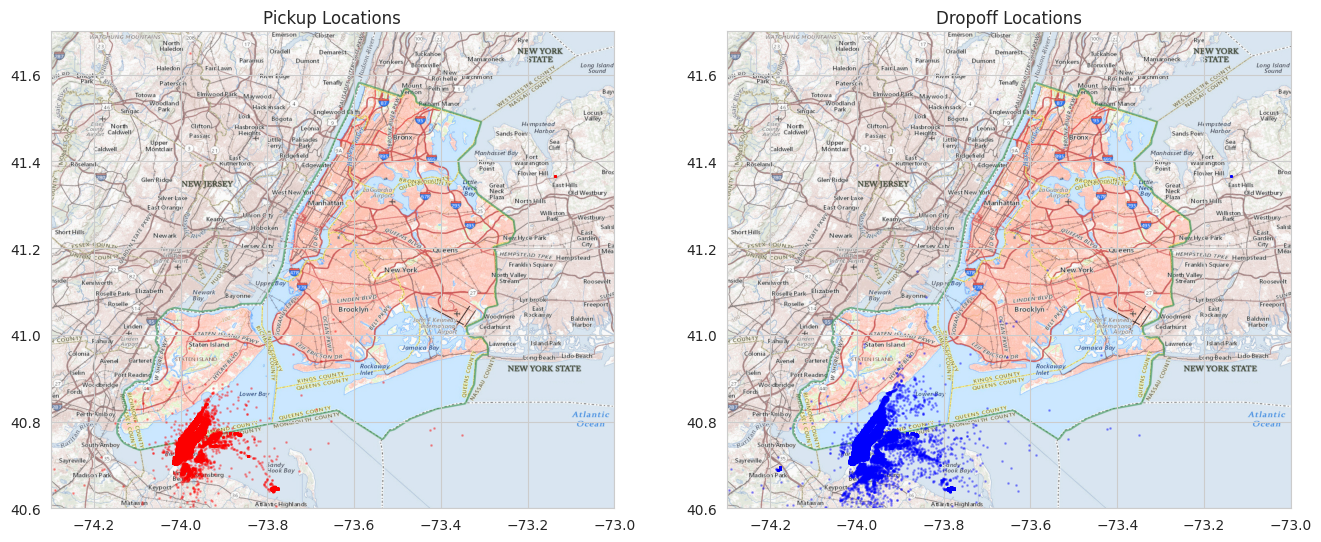

In [35]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

#### Plotting testing Data on Map

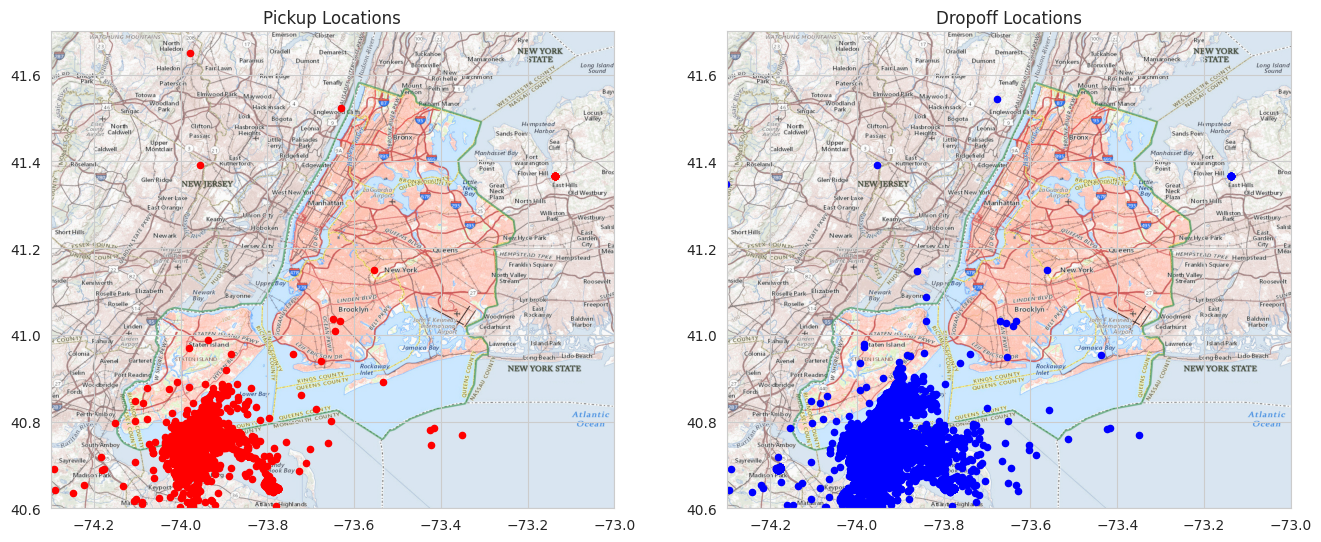

In [36]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

### Scatter Plot

In [37]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

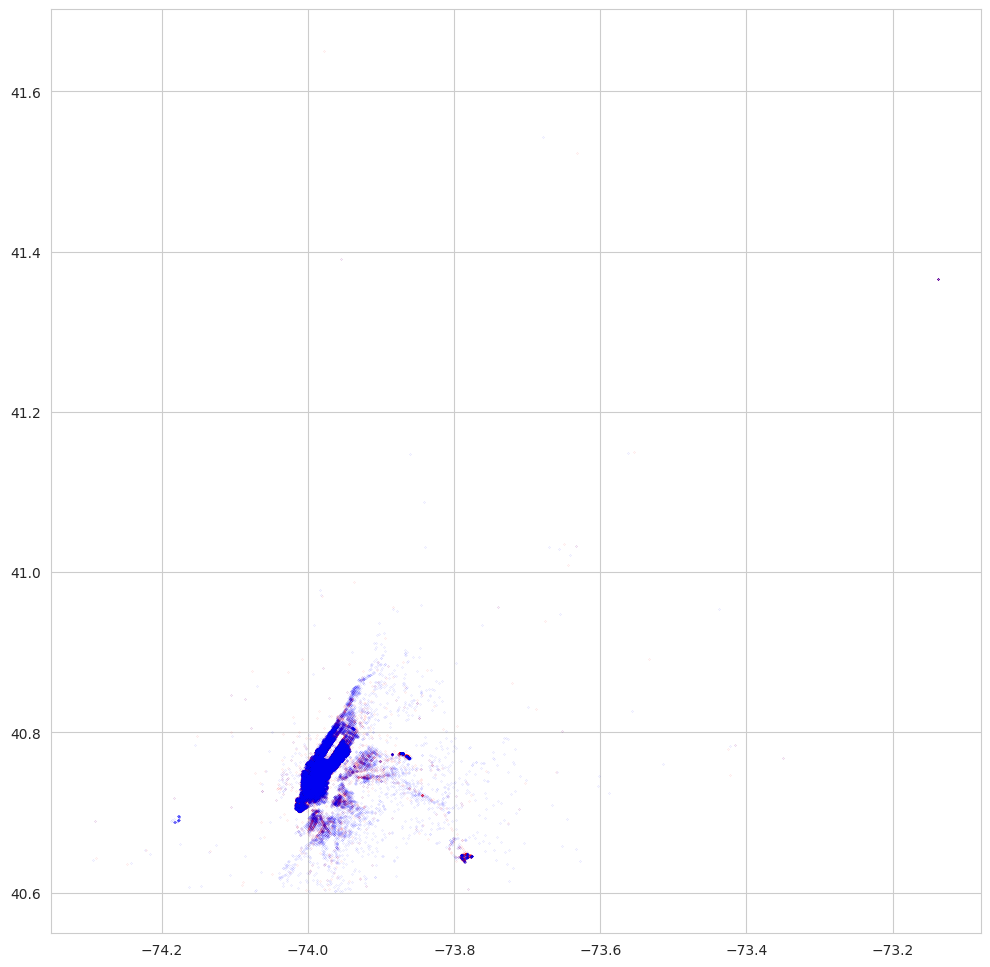

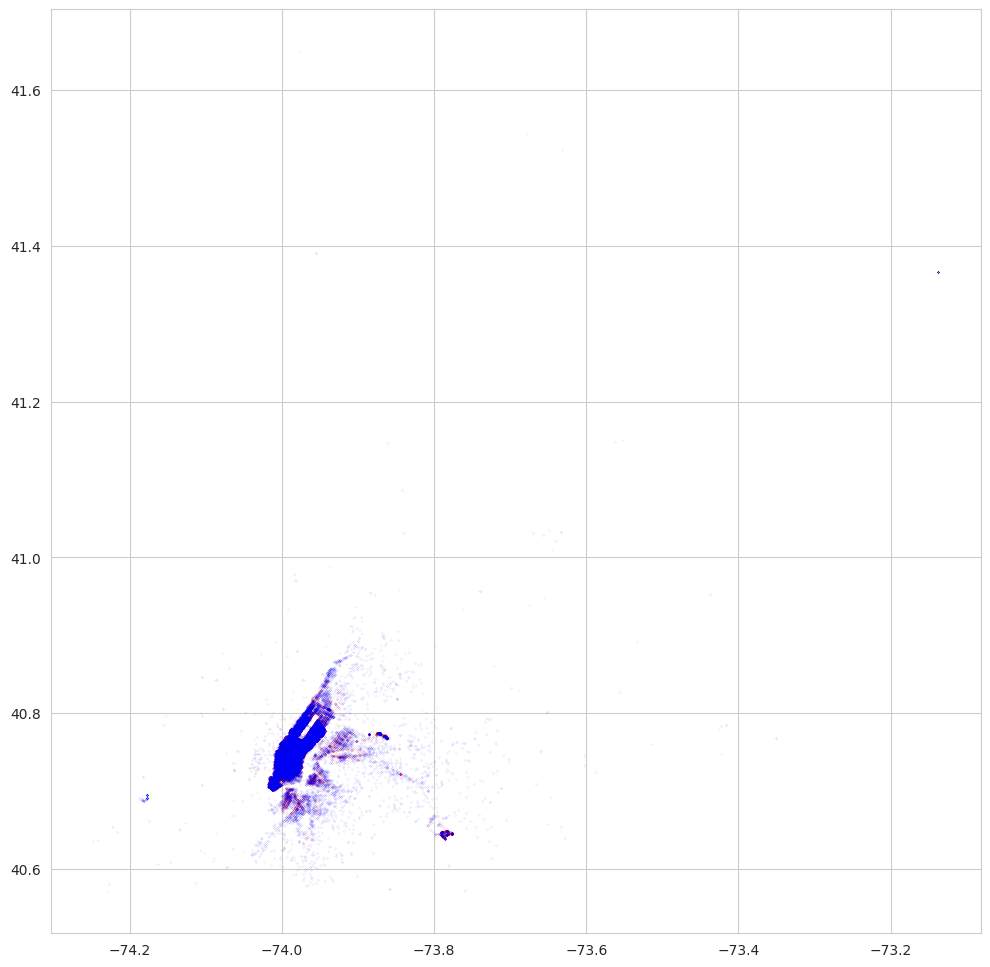

In [38]:
plot_hires(df_train, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df_test, (-74.26, -72.98, 40.57, 41.71))

In [39]:
# add time information
df_train['year'] = df_train["pickup_datetime"].apply(lambda t: t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t: t.weekday())
df_train['hour'] = df_train["pickup_datetime"].apply(lambda t: t.hour)

### Distance and Time Visualization

1. **The longer the distance between pickup and dropoff locations, the higher the fare.**
2. **Some trips, like to/from an airport are fixed fee.**
3. **Fare at night is different from the day time.**

### Formula to be used for calculating the distance between latitude and longitude

In [40]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

#### The longer the distance between pickup and dropoff location, higher the fare. Adding new column to dataframe with distance in miles

In [41]:
df_train["distance_miles"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"],
                                      df_train["dropoff_latitude"], df_train["dropoff_longitude"])

In [42]:
df_train.head(2)

key  fare_amount           pickup_datetime  \
0  2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1  2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   

   passenger_count  year  weekday  hour  distance_miles  
0                1  2009        0    17        0.640487  
1                1  2010        1    16        5.250670

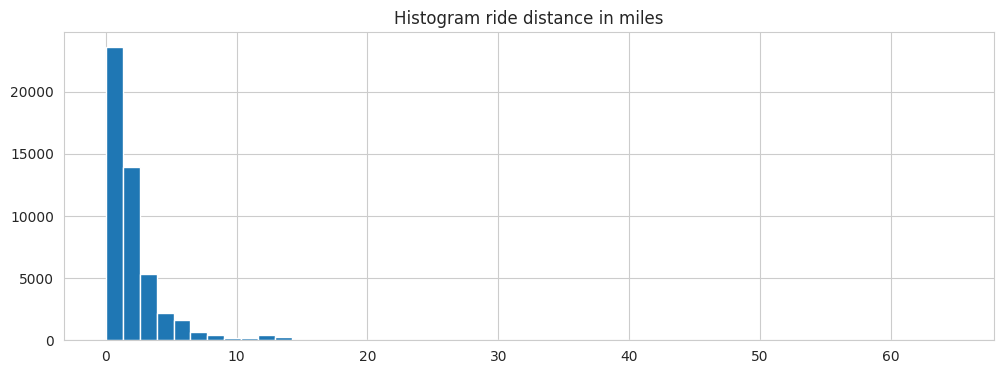

In [43]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [44]:
df_train["distance_miles"].describe()

count    48898.000000
mean         2.078660
std          2.412300
min          0.000000
25%          0.784894
50%          1.340872
75%          2.443089
max         64.644331
Name: distance_miles, dtype: float64

#### It seems most rides are just short rides, with a small peak at ~13 miles. This peak could be due to airport drives.

In [45]:
df_train.groupby('passenger_count')['distance_miles','fare_amount'].mean()

<ipython-input-45-55c21459c90b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('passenger_count')['distance_miles','fare_amount'].mean()


distance_miles  fare_amount
passenger_count                             
0                      1.935823     9.489308
1                      2.047560    11.184856
2                      2.209886    11.992286
3                      2.044863    11.221176
4                      2.050820    11.376552
5                      2.108579    11.292593
6                      2.210908    12.441990

#### Scatter Plot distance vs Fare

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

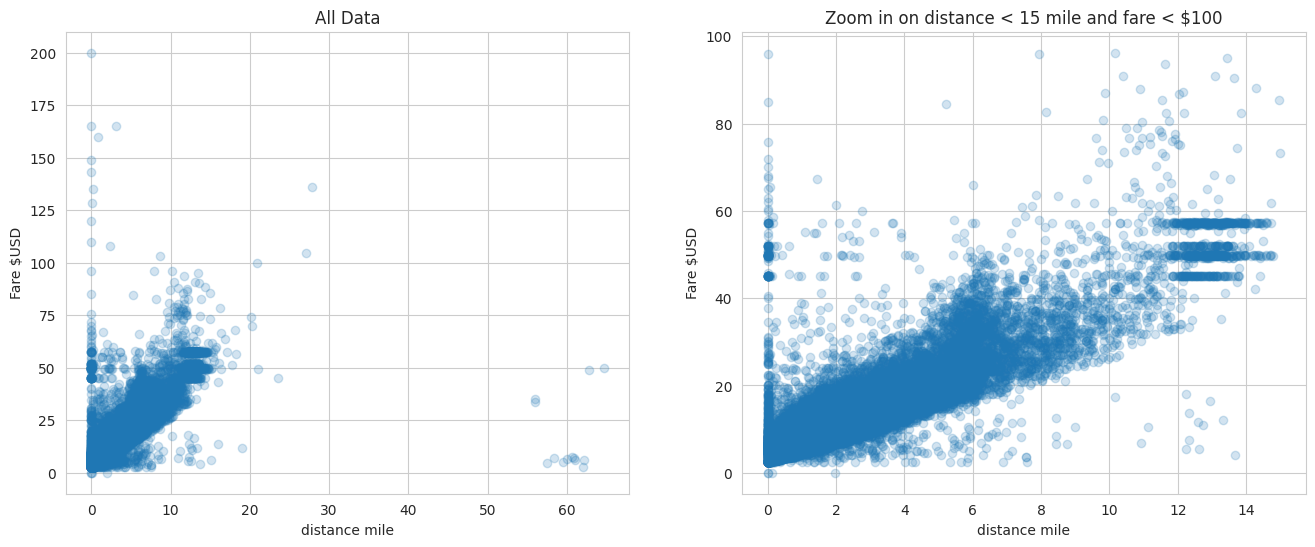

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

**Few Obervations -**
1. There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
2. There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips.
3. The horizontal lines in the right plot might indicate again the fixed fare trips to/from JFK airport.
Overall there seems to be a (linear) relation between distance and fare with an average rate of +/- 100/20 = 5 $USD/mile

In [47]:
# remove datapoints with distance <0.05 miles
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 48898
New size: 48100


In [48]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [49]:
def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(df_train["pickup_latitude"], df_train["pickup_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))

    idx = (distance(df_train["dropoff_latitude"], df_train["dropoff_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

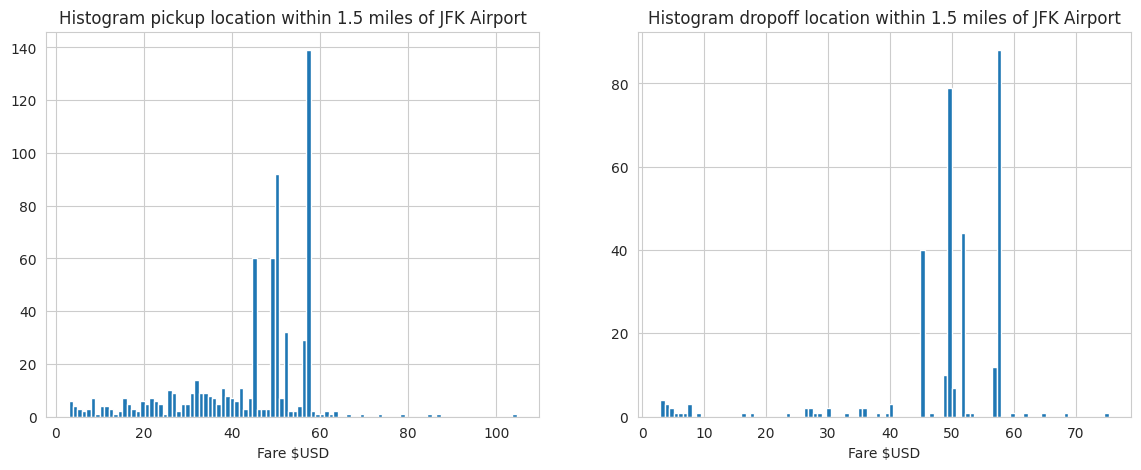

In [50]:
plot_location_fare(jfk, 'JFK Airport')

In [51]:
#Other Airports
ewr = (-74.175, 40.69) #Newark Liberty International Airport https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) #Laguardia Airport, https://www.travelmath.com/airport/LGA

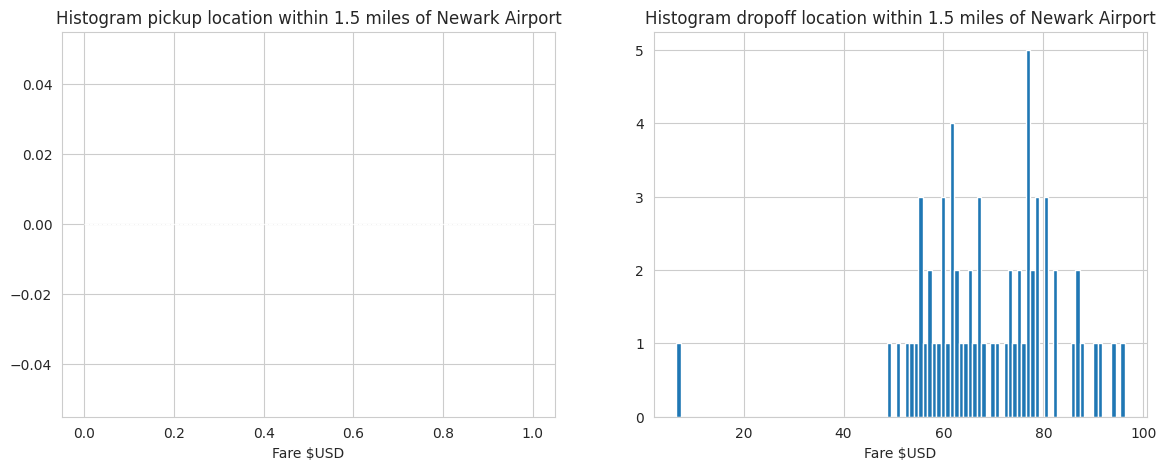

In [52]:
plot_location_fare(ewr, 'Newark Airport')

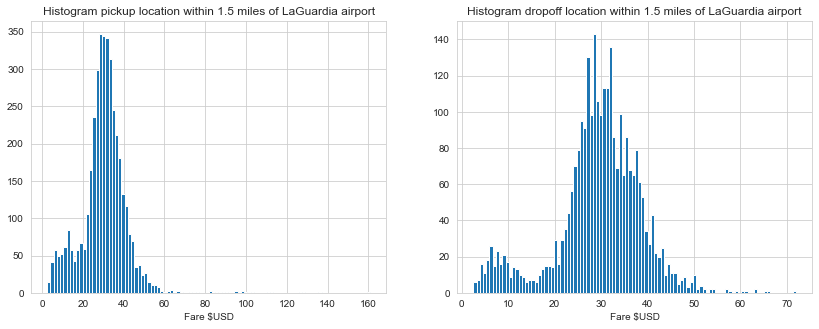

In [ ]:
plot_location_fare(lgr, 'LaGuardia airport')

#### Fare at night is different from the day time

In [53]:
df_train["fare_per_mile"] = df_train["fare_amount"] / df_train["distance_miles"]

In [54]:
df_train["fare_per_mile"].describe()

count    48100.000000
mean         7.463037
std         17.446999
min          0.000000
25%          4.757995
50%          6.126563
75%          8.067029
max       2555.639737
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

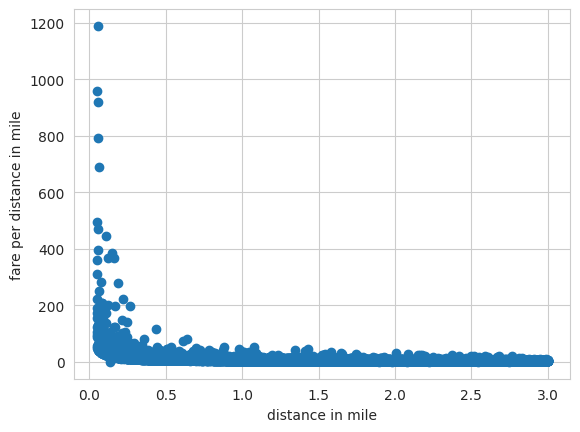

In [55]:
idx = (df_train["distance_miles"] < 3) & (df_train["fare_amount"] < 100)
plt.scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

### Pivot Table

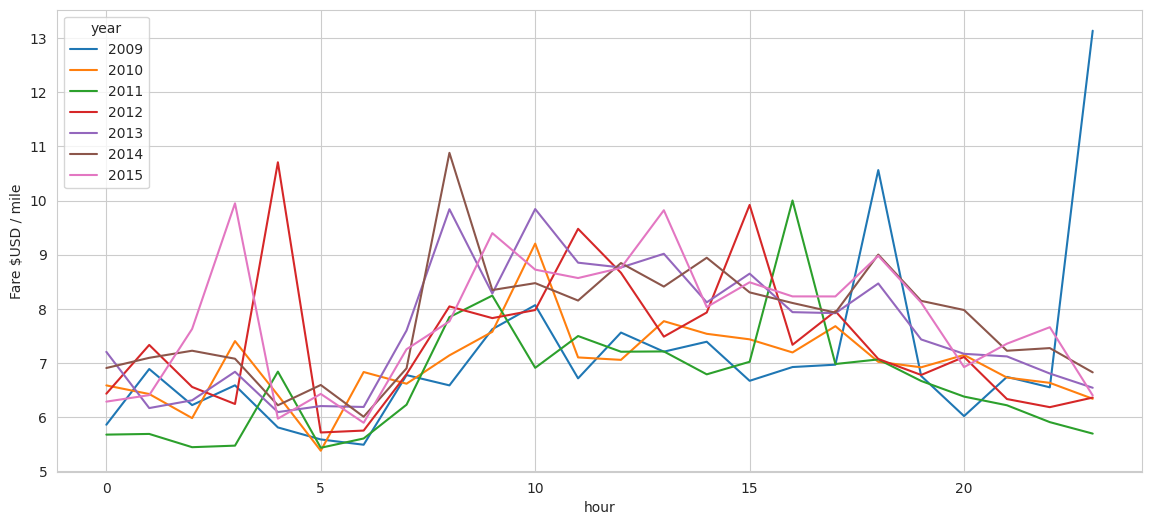

In [56]:
df_train.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14,6))
plt.ylabel("Fare $USD / mile");

### Fare and Time Dependency Per Year

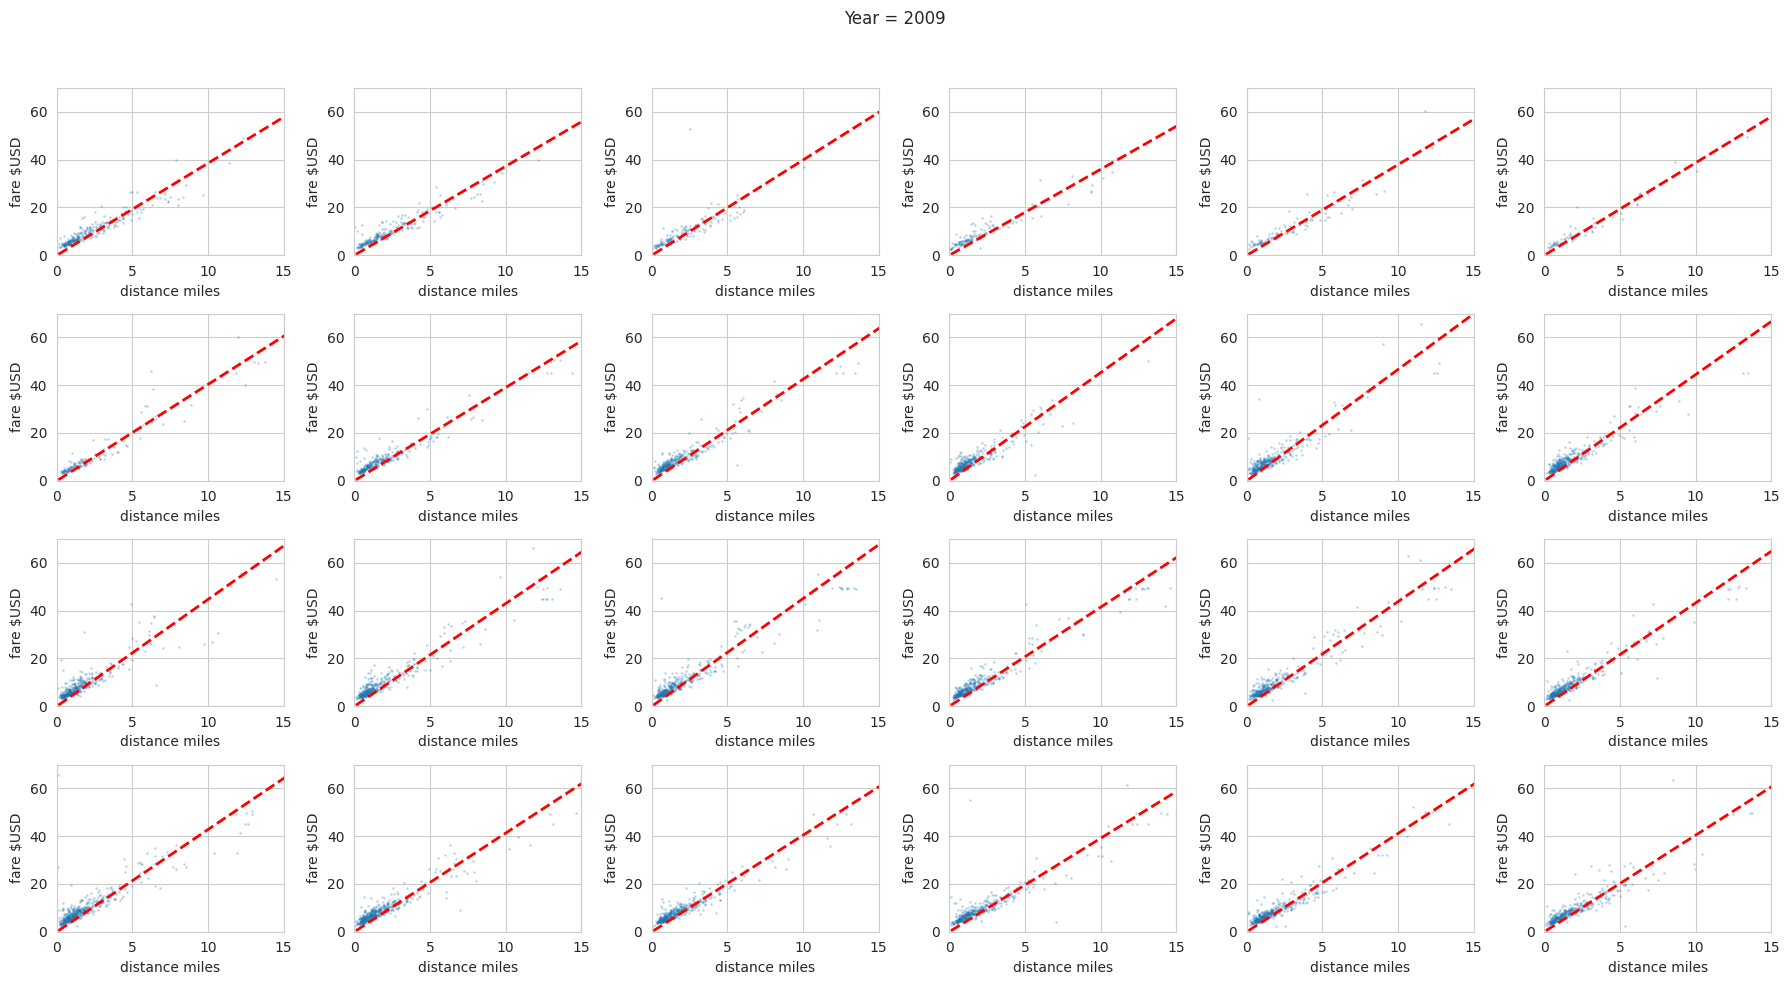

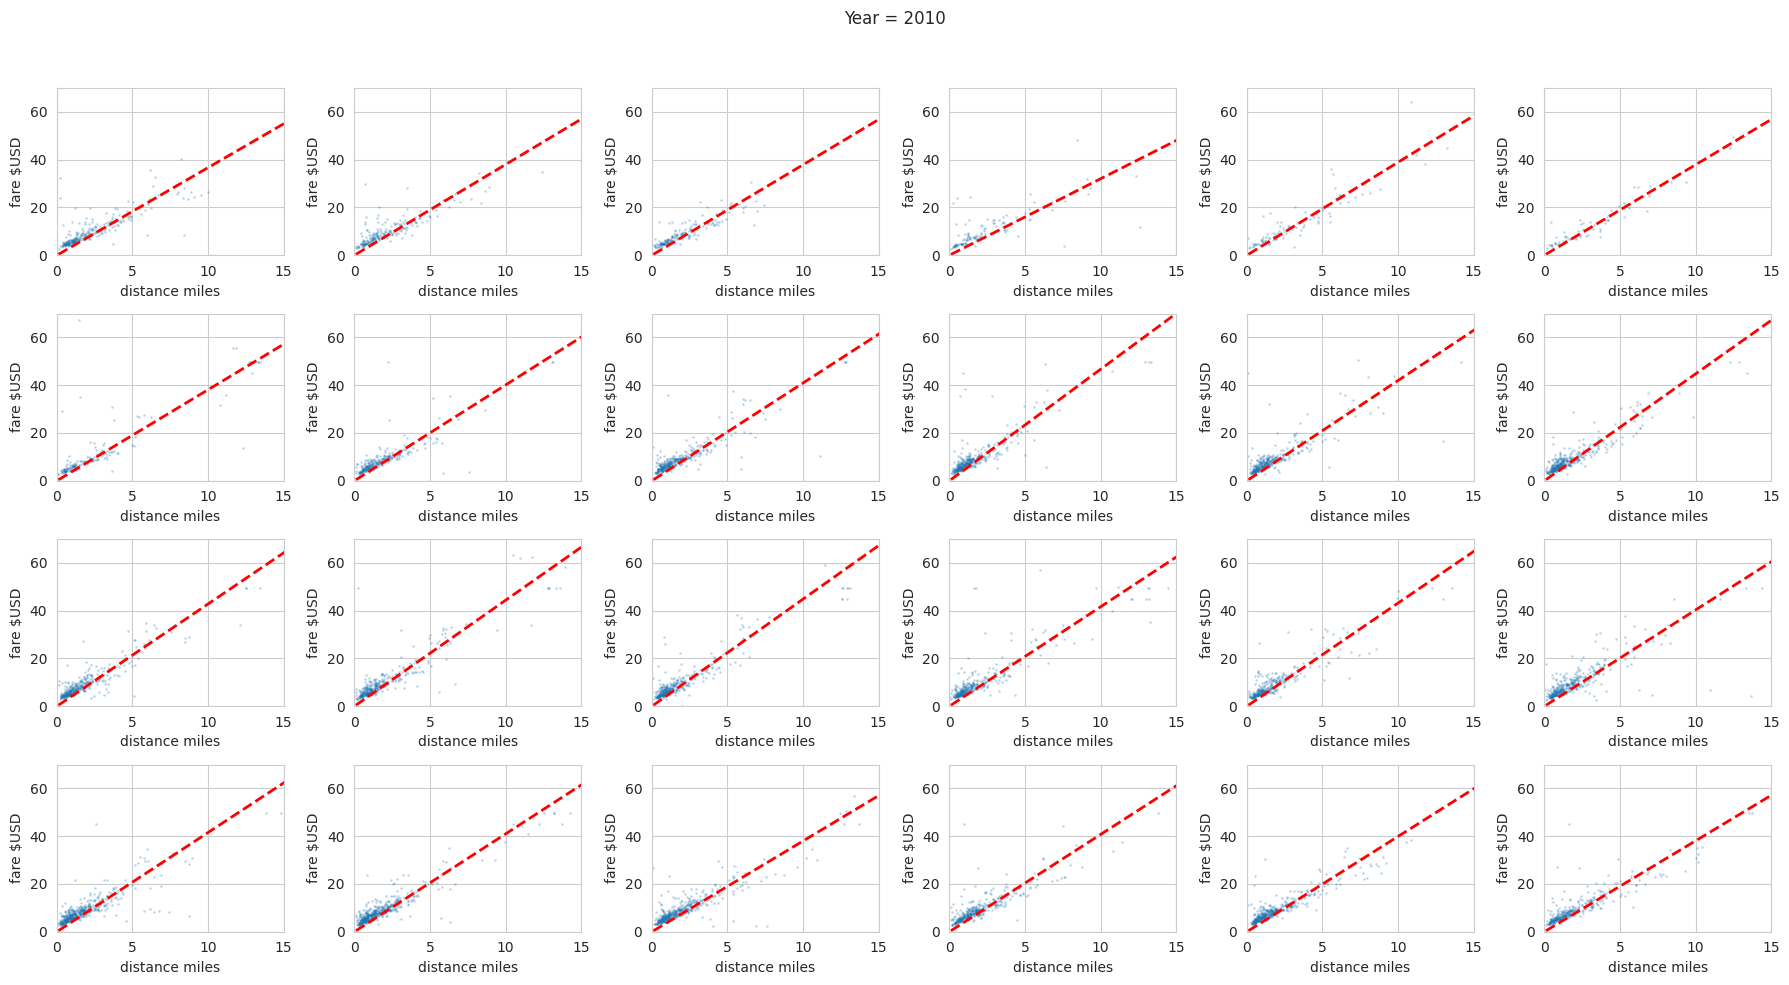

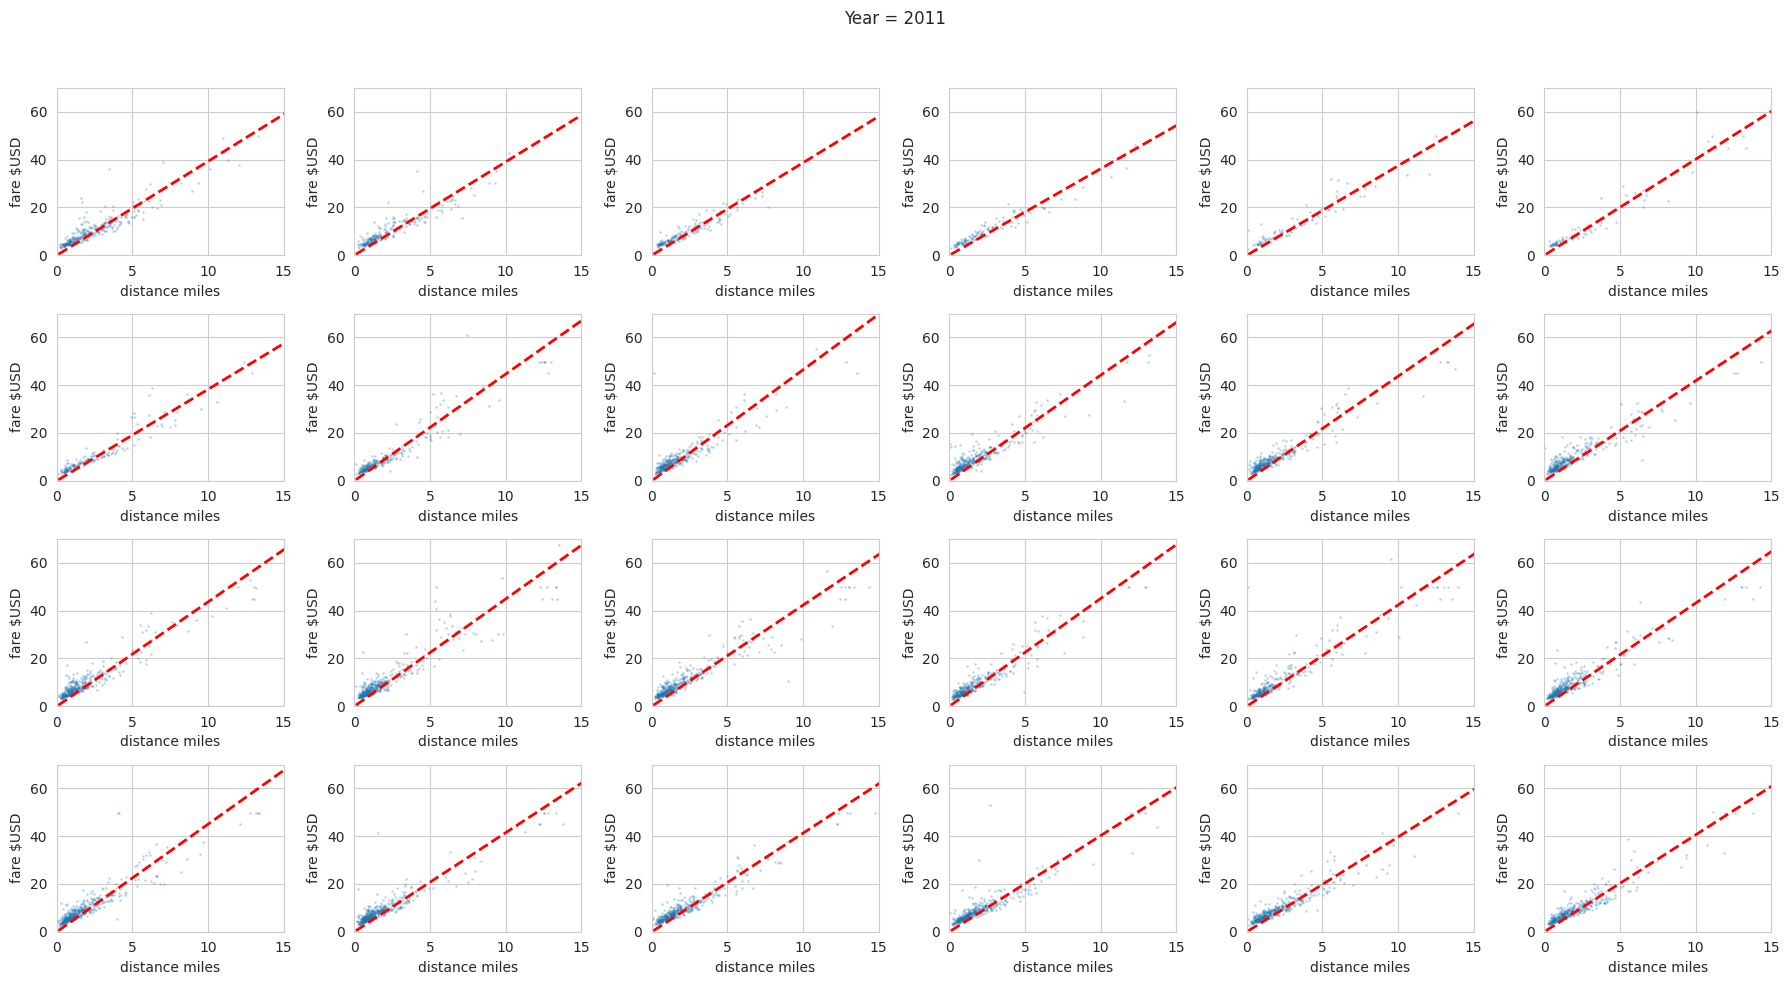

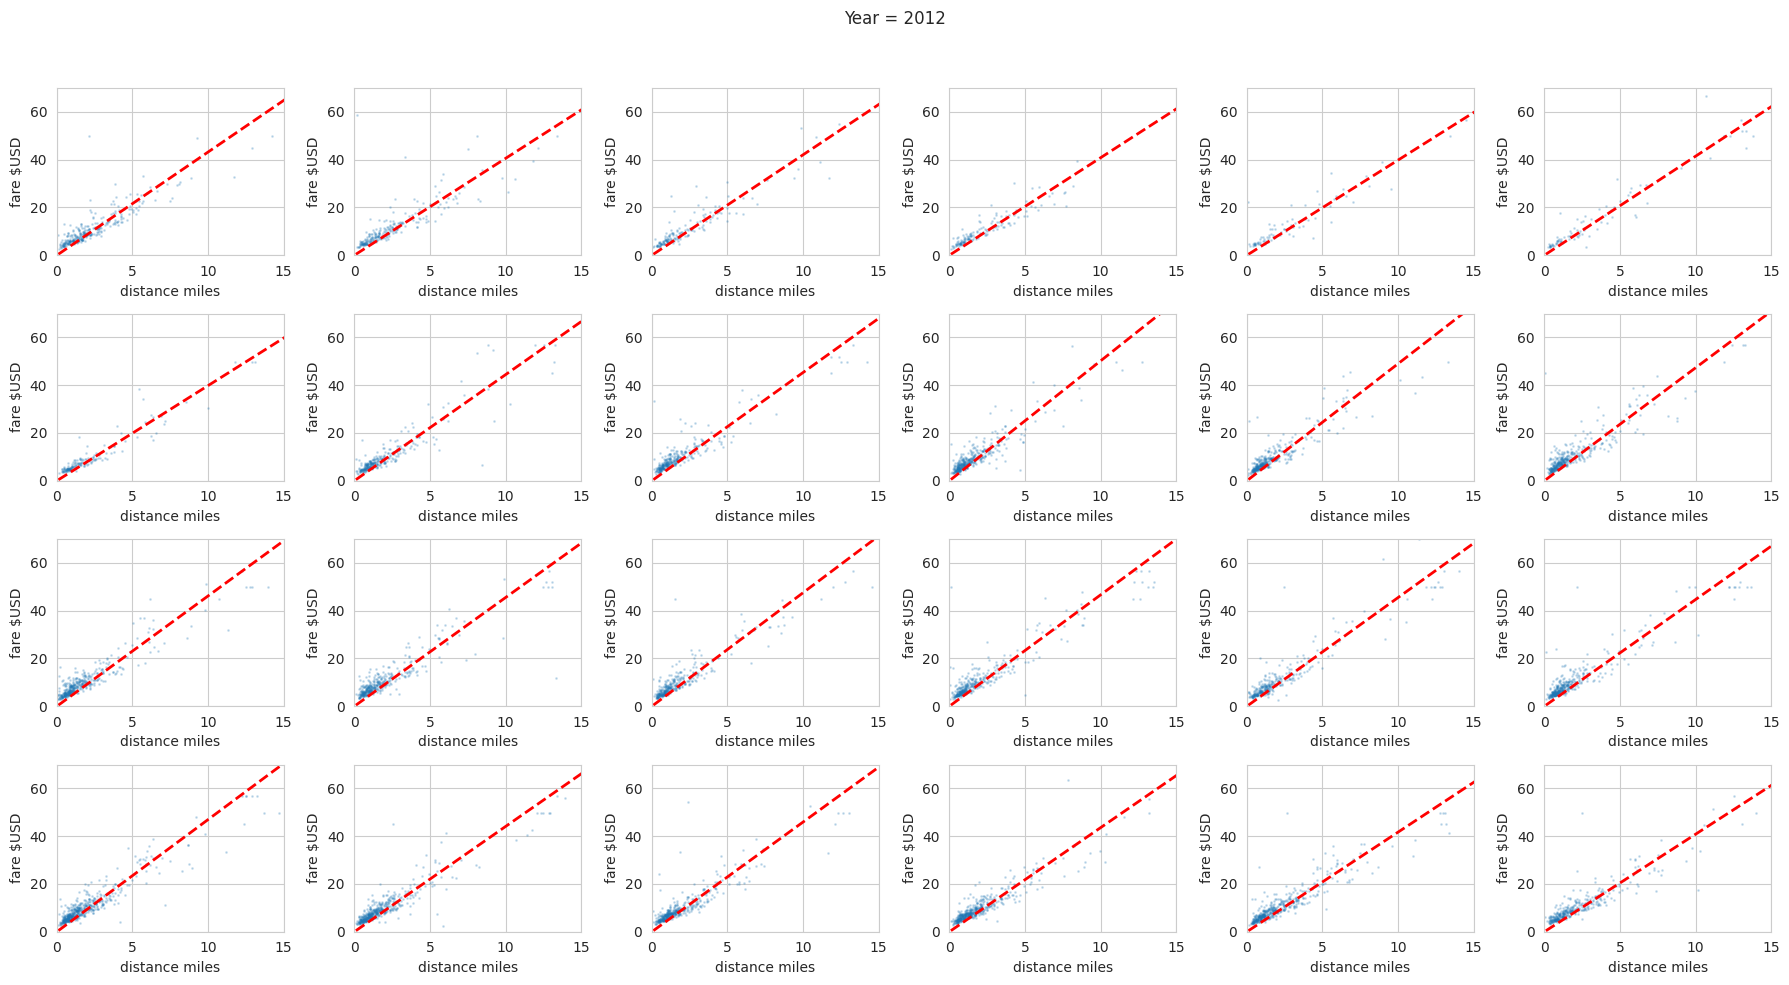

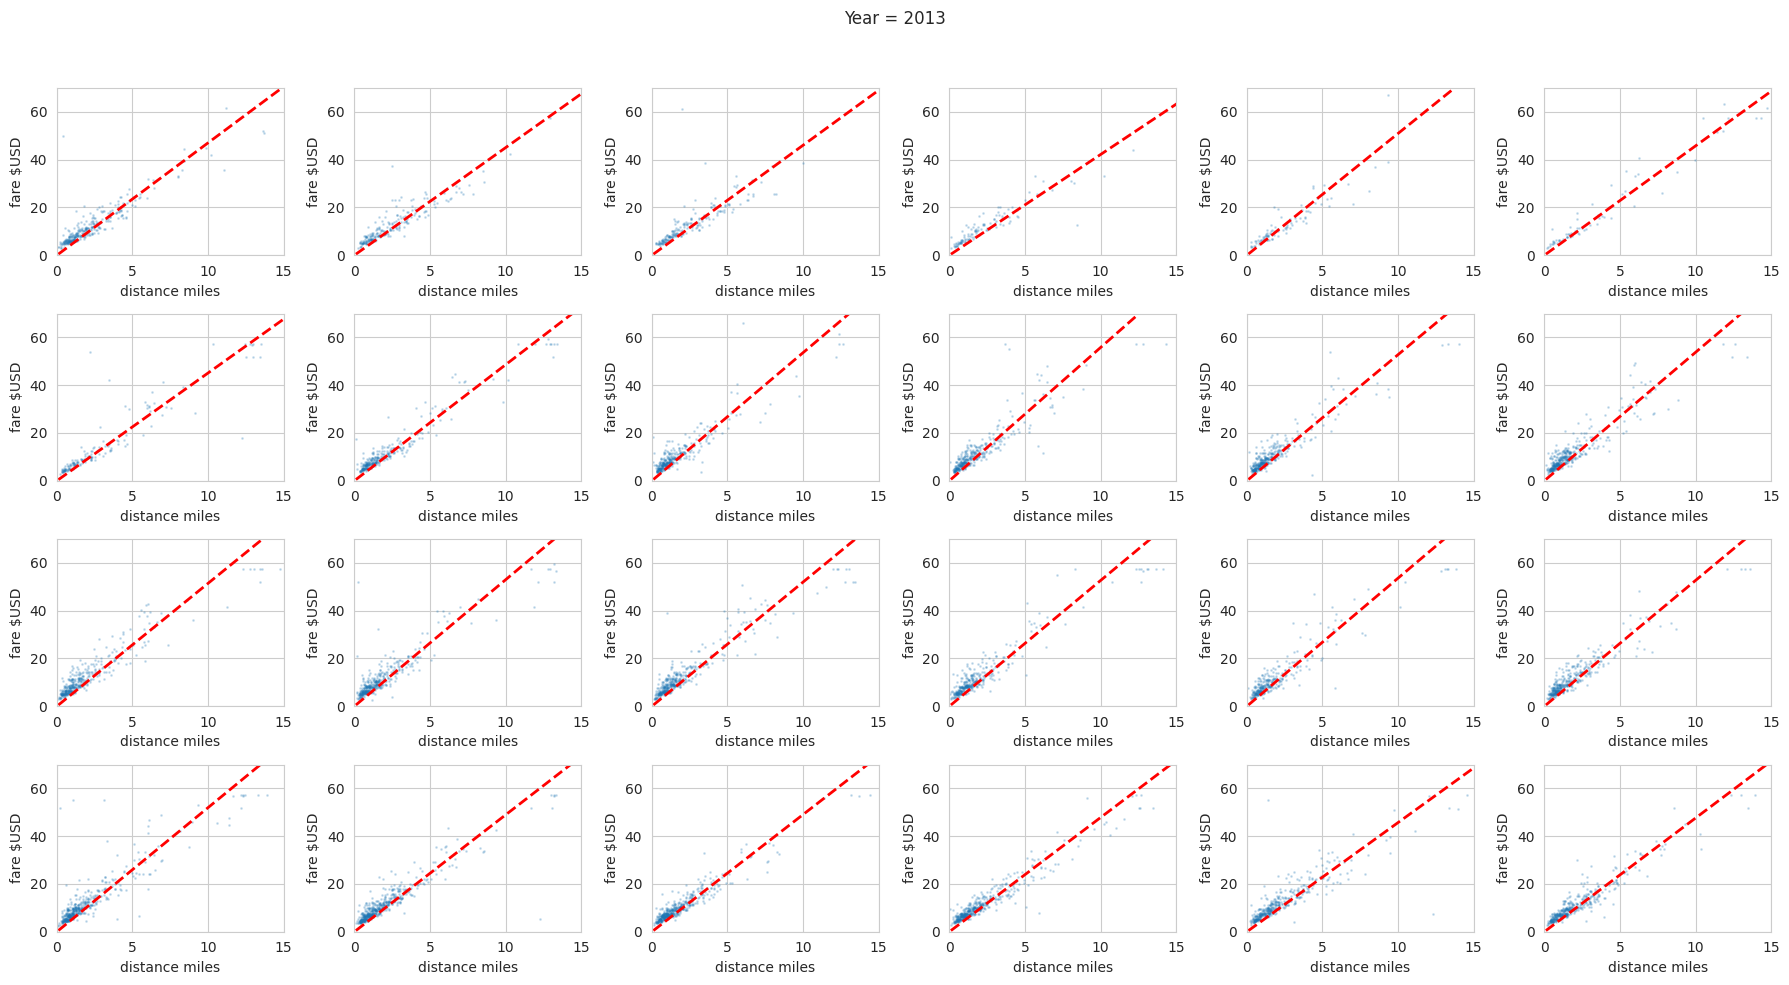

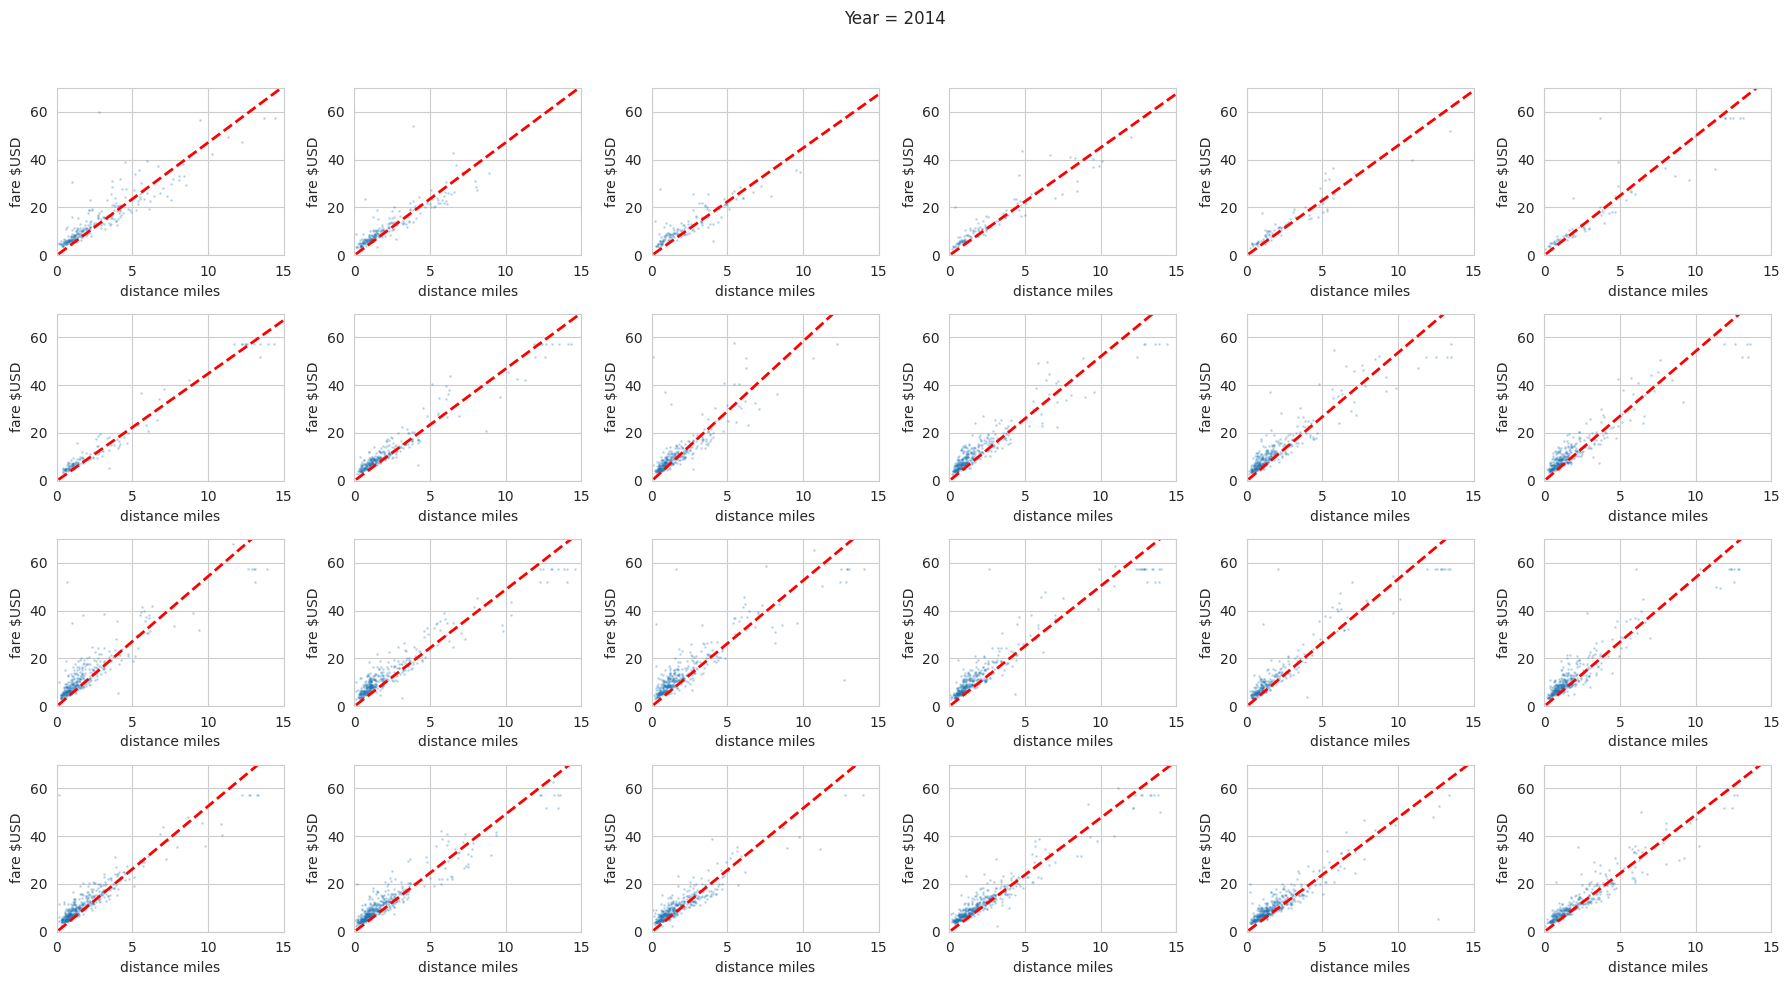

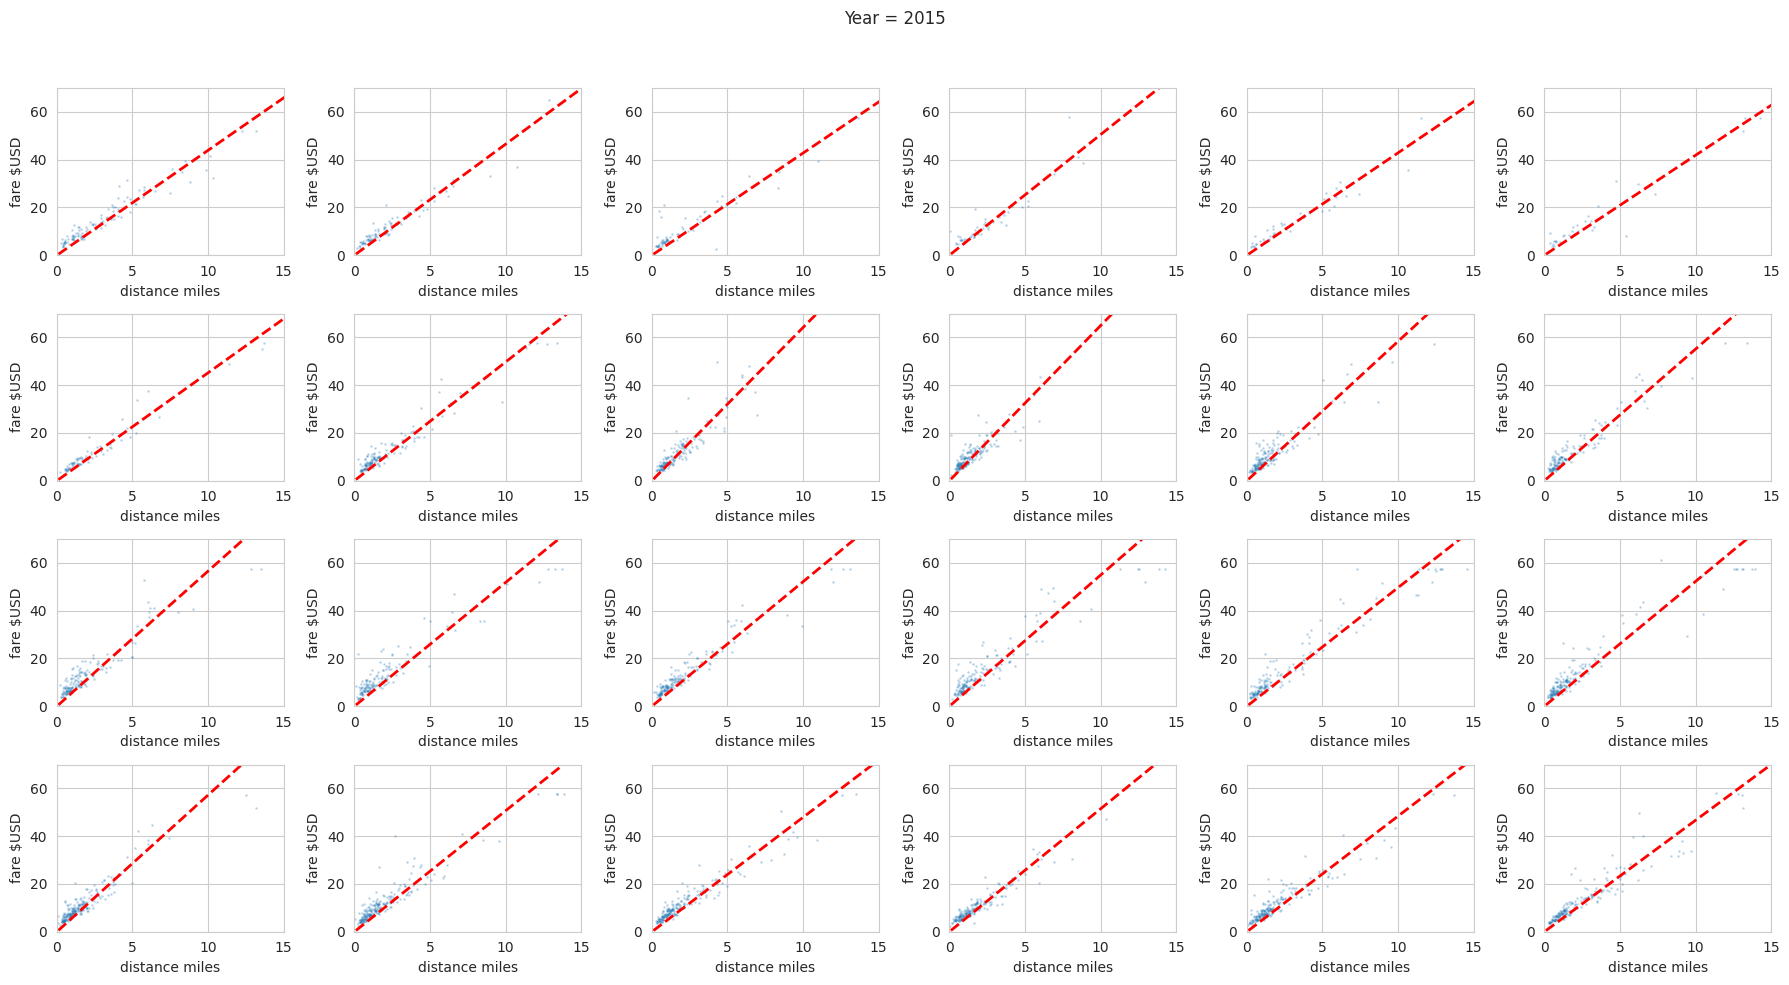

In [57]:
from sklearn.linear_model import LinearRegression

# plot all years
for year in df_train["year"].unique():

    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()

    # plot for all hours

    for h in range(24):
        idx = (df_train["distance_miles"] < 15) & (df_train["fare_amount"] < 100) & (df_train["hour"] == h) & \
              (df_train["year"] == year)
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))

        model = LinearRegression(fit_intercept=False)

        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["fare_amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

### Relevance of direction for calculation of fare amount

In [58]:
df_train["delta_lon"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
df_train["delta_lat"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]

#### Select trips in Manhattan

In [59]:
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

Text(0.5, 1.0, 'log1p(fare_amount)')

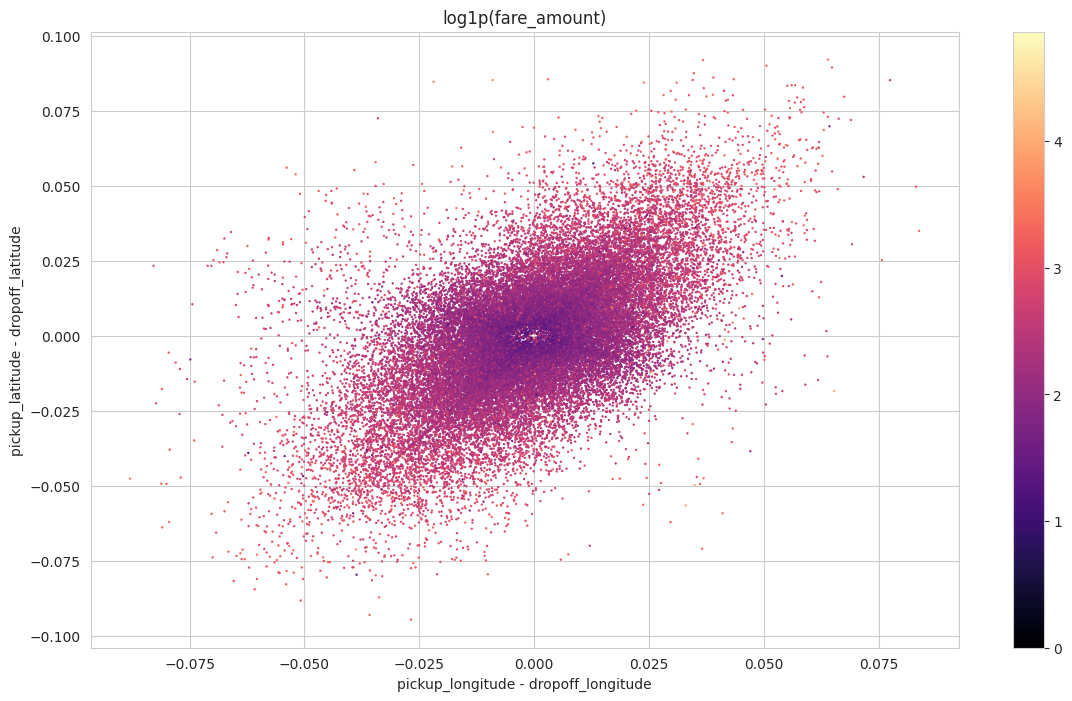

In [60]:
plt.figure(figsize=(14,8))
plt.scatter(df_train[idx_manhattan]["delta_lon"], df_train[idx_manhattan]["delta_lat"], s=0.5, alpha=1.0,
            c=np.log1p(df_train[idx_manhattan]["fare_amount"]), cmap="magma")
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latitude')
plt.title('log1p(fare_amount)')

#### Looks like direction of the trip seems to matter. Direction of a trip, from 180 to -180 degrees. Horizontal axes = 0 degrees

In [61]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [62]:
df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

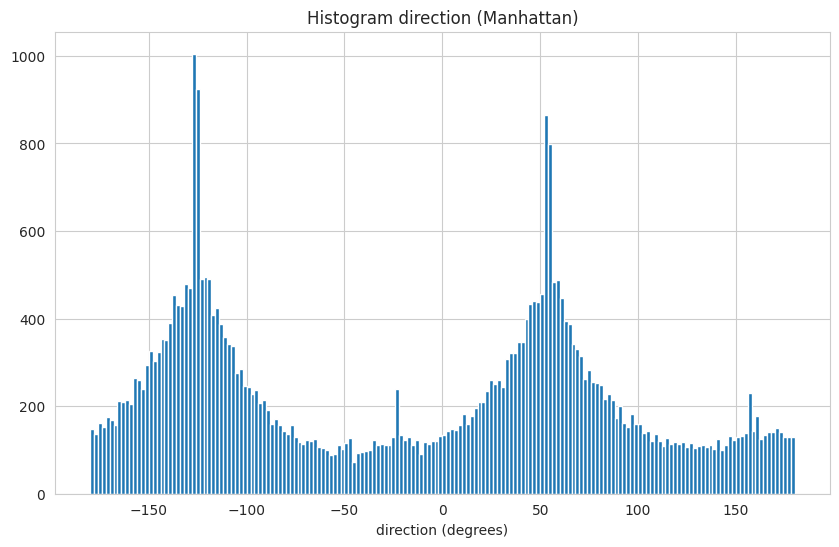

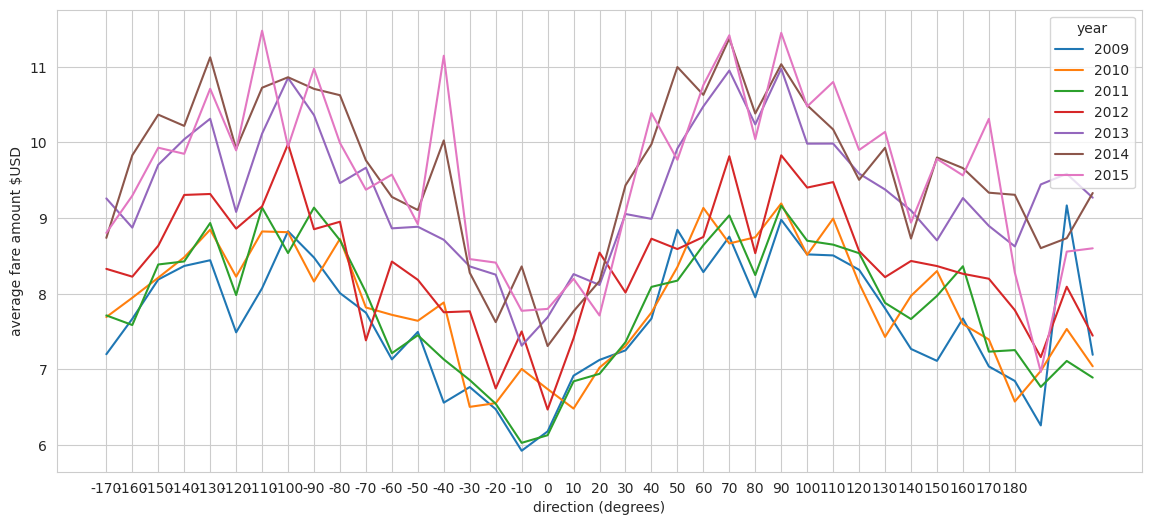

In [63]:
# plot histogram of directions
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

df_train[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

#### Fare varies with pickup location

In [65]:
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["pickup_latitude"], df_train["pickup_longitude"])

In [66]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

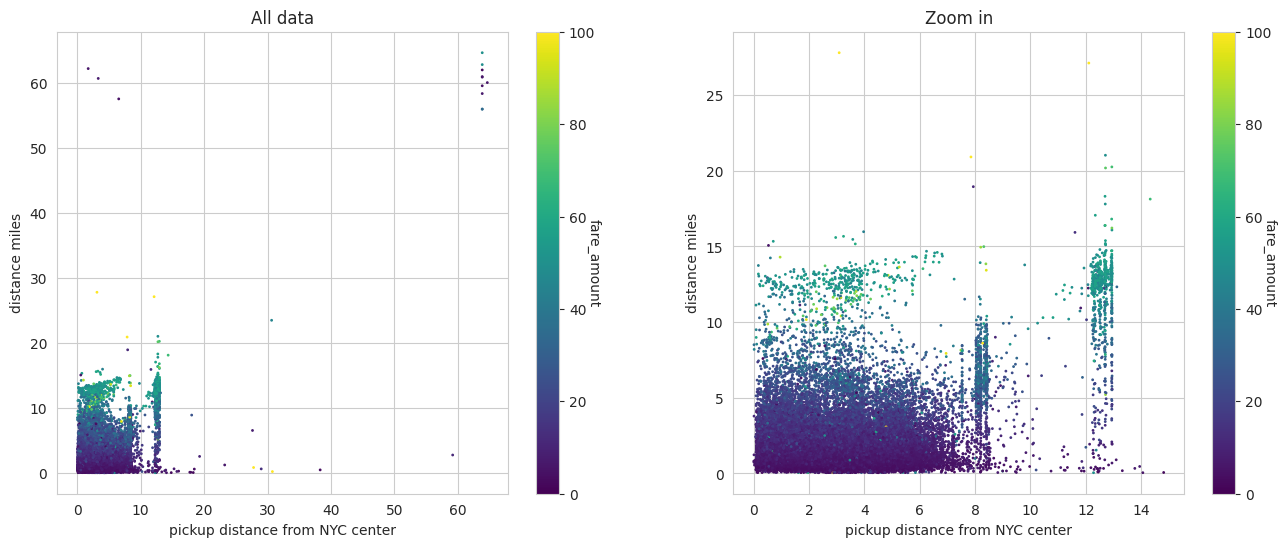

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["fare_amount"], 0, 100),
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)


idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"],
                     c=np.clip(df_train[idx]["fare_amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

#### There is a lot of 'green' dots, which is about \$50 to \$60 fare amount near 13 miles distance of NYC center of distrance of trip. This could be due to trips from/to JFK airport

### Baseline Model and Submission

In [68]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test["pickup_latitude"], df_test["pickup_longitude"],
                                     df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['distance_to_center'] = distance(nyc[1], nyc[0], df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['hour'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).year)
df_test['weekday'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).weekday())

In [69]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

In [70]:
df_test.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  distance_miles  distance_to_center  hour  year  weekday  
0                1        0.640487            8.630724    17  2009        0  
1                1        5.250670            4.897374    16  2010        1  
2                2        0.863411            2.636757     0  2011        3  
3                1        1.739386            3.132577     4  2012        5  
4                1        1.242218            5.468020     7  2010        1

In [71]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train["distance_to_center"] < 15) & (df_train["passenger_count"] != 0)

features = ['year', 'hour', 'distance_miles', 'passenger_count','weekday','distance_to_center']

X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values

In [72]:
print(X.shape, y.shape)

(47915, 6) (47915,)


In [73]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))

    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))

    if title!='':
        fig.suptitle(title)

In [74]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

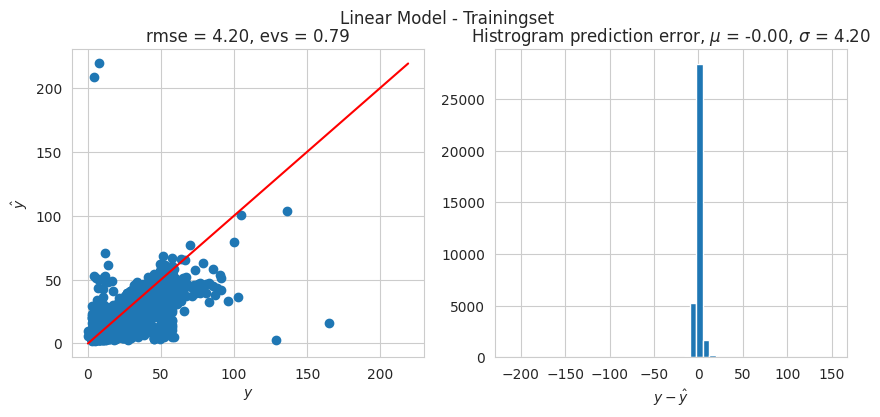

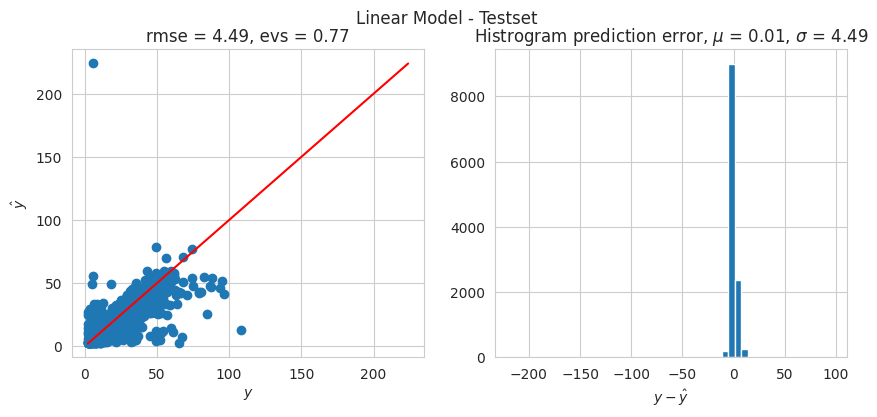

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

#### Generate Kaggle Submission

In [76]:
# define dataset
XTEST = df_test[features].values

In [77]:
y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {
        'key': df_test["key"],
        'fare_amount': y_pred_final
    },
    columns = ['key', 'fare_amount'])
submission.to_csv(r'train.csv', index = False)

In [78]:
submission.head()

key  fare_amount
0    2009-06-15 17:26:21.0000001     5.465825
1    2010-01-05 16:52:16.0000002    21.901021
2   2011-08-18 00:35:00.00000049     6.294735
3    2012-04-21 04:30:42.0000001     9.928529
4  2010-03-09 07:51:00.000000135     7.598742